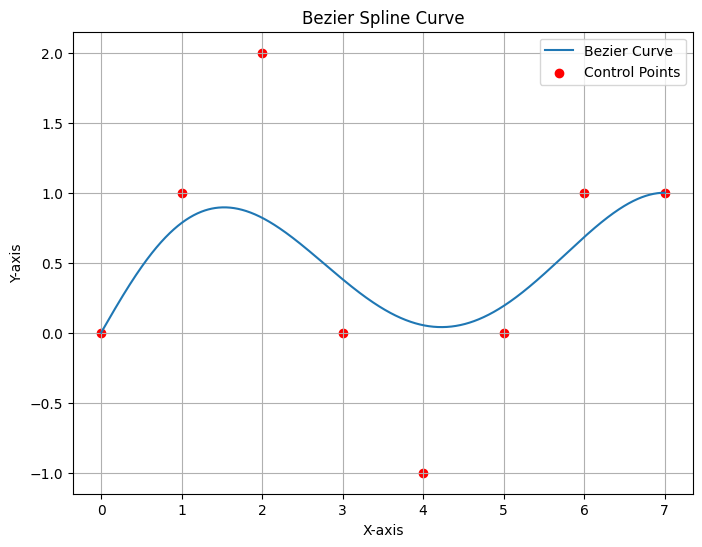

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def bezier_curve(control_points, num_points=1000):
    """
    Compute a Bezier curve from given control points.
    
    :param control_points: A list of control points, where each point is a list [x, y].
    :param num_points: Number of points to compute on the curve.
    :return: A list of points on the Bezier curve.
    """
    degree = len(control_points) - 1
    binomial_coefficients = [comb(degree, i) for i in range(degree + 1)]

    def bezier_point(t):
        """ Calculate a point on the Bezier curve for a given t """
        x, y = 0, 0
        for i, point in enumerate(control_points):
            bernstein = binomial_coefficients[i] * ((1 - t) ** (degree - i)) * (t ** i)
            x += point[0] * bernstein
            y += point[1] * bernstein
        return [x, y]

    return [bezier_point(t) for t in np.linspace(0, 1, num_points)]

# Define the spline data
spline_data = {
    "path_type": "spline",
    "spline_type": "Bezier",
    "degree": 3,
    "control_points": [[0, 0], [1, 1], [2, 2], [3, 0], [4, -1], [5, 0], [6, 1],[7,1]]  # Add more points as required
}

# Generate Bezier curve points
bezier_points = bezier_curve(spline_data["control_points"])

# Extract X and Y coordinates
x_points, y_points = zip(*bezier_points)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(x_points, y_points, label="Bezier Curve")
plt.scatter(*zip(*spline_data["control_points"]), color='red', label="Control Points")
plt.legend()
plt.title("Bezier Spline Curve")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


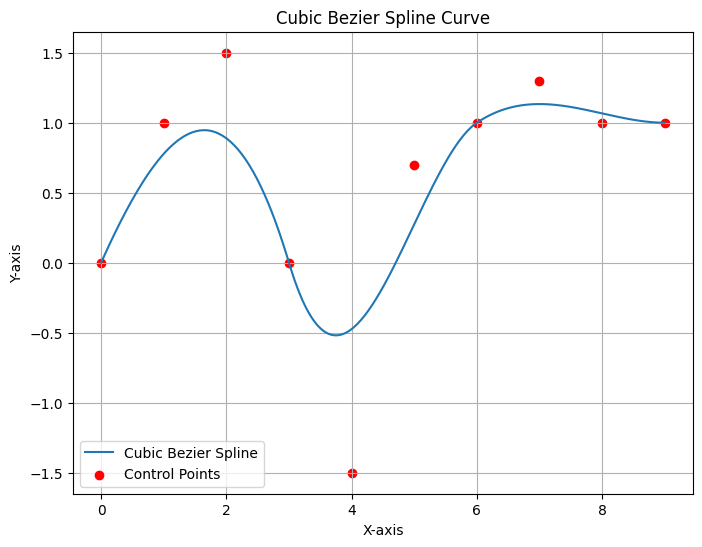

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def cubic_bezier_curve(control_points, num_points=100):
    """
    Compute cubic Bezier curves from given control points.
    
    :param control_points: A list of control points, where each point is a list [x, y].
    :param num_points: Number of points to compute on each curve segment.
    :return: A list of points on the cubic Bezier curve.
    """
    def bezier_point(t, cp):
        """ Calculate a point on a cubic Bezier curve for a given t """
        x, y = 0, 0
        degree = 3
        binomial_coefficients = [comb(degree, i) for i in range(degree + 1)]
        for i in range(4):
            bernstein = binomial_coefficients[i] * ((1 - t) ** (3 - i)) * (t ** i)
            x += cp[i][0] * bernstein
            y += cp[i][1] * bernstein
        return [x, y]

    curve_points = []
    for i in range(0, len(control_points) - 3, 3):
        cp_segment = control_points[i:i + 4]
        segment_points = [bezier_point(t, cp_segment) for t in np.linspace(0, 1, num_points)]
        curve_points.extend(segment_points)

    return curve_points

# Define the spline data
spline_data = {
    "path_type": "spline",
    "spline_type": "Bezier",
    "degree": 3,
    "control_points": [[0, 0], [1, 1], [2, 1.5], [3, 0], [4, -1.5], [5, 0.7], [6, 1],[7,1.3],[8,1],[9,1]]  # Example control points
}

# Generate cubic Bezier curve points
bezier_points = cubic_bezier_curve(spline_data["control_points"])

# Extract X and Y coordinates
x_points, y_points = zip(*bezier_points)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(x_points, y_points, label="Cubic Bezier Spline")
plt.scatter(*zip(*spline_data["control_points"]), color='red', label="Control Points")
plt.legend()
plt.title("Cubic Bezier Spline Curve")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()
